In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

from filaments.plot import *
from filaments.processing import *

# Statistical study of anomalies - South China Sea

In [4]:
path = "../../data/SCS/"
images_path = "../../immagini/SCS/"

In [8]:
chlorophyll = xr.open_dataset(path + "MODIS_chl_extended_8D.nc").chlor_a

chl_anomalies = xr.open_dataset(path + "MODIS_chl_anomalies_8D.nc").chlor_a

chl_deviation = chlorophyll.assign_coords(day_of_year = chlorophyll.time.dt.strftime("%d-%m")).groupby("day_of_year") \
                - chlorophyll.assign_coords(day_of_year = chlorophyll.time.dt.strftime("%d-%m")).groupby("day_of_year").mean("time")

bathy = xr.open_dataset(path + "bathymetry_interpolated.nc")

bathymetry_coast = bathy.where((bathy.elevation >= -1000)).elevation.to_numpy()

lons, lats = chlorophyll.lon, chlorophyll.lat

In [11]:
lon_min = 112.025
lon_max = 112.025
lat_min = 11.
lat_max = 13.

# Distribution of chlorophyll values

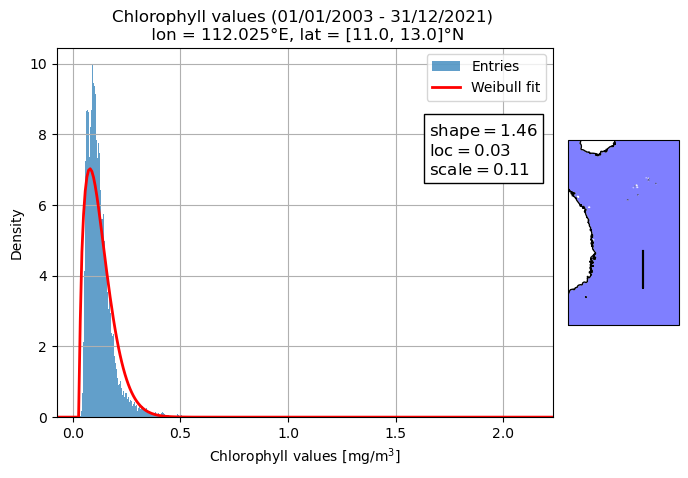

In [13]:
fig, ax = plot_histogram(chlorophyll, [lon_min, lon_max], [lat_min, lat_max], region = True, fit_func=weibull_min)

title = "Chlorophyll values (01/01/2003 - 31/12/2021) \n lon = %s°E, lat = %s°N" \
        %(lon_min, [lat_min, lat_max])

ax.set_title(title)
ax.set_xlabel("Chlorophyll values [mg/m$^3$]")

plt.savefig(images_path + "chl_values_histogram.png", bbox_inches = "tight")

# Distribution of deviations from climatology

c:\Users\feder\miniconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1833: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


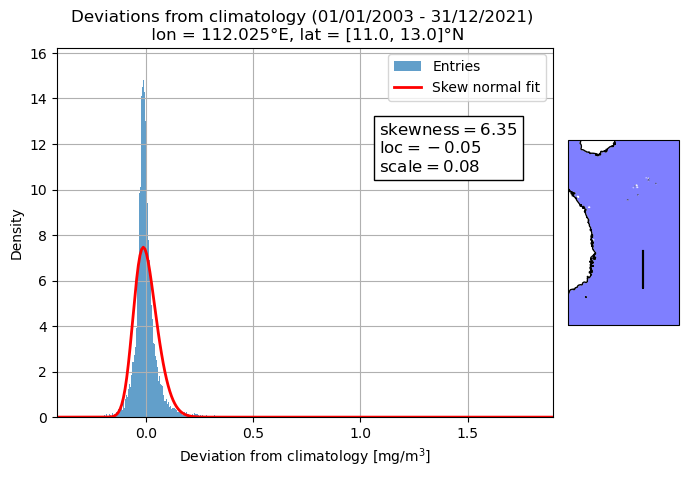

In [9]:
fig, ax = plot_histogram(chl_deviation, [lon_min, lon_max], [lat_min, lat_max], region = True, fit_func=skewnorm)

title = "Deviations from climatology (01/01/2003 - 31/12/2021) \n lon = %s°E, lat = %s°N" \
        %(lon_min, [lat_min, lat_max])

ax.set_title(title)

ax.set_xlabel("Deviation from climatology [mg/m$^3$]")

plt.savefig(images_path + "deviations_histogram.png", bbox_inches = "tight")

# Distributions of anomalies

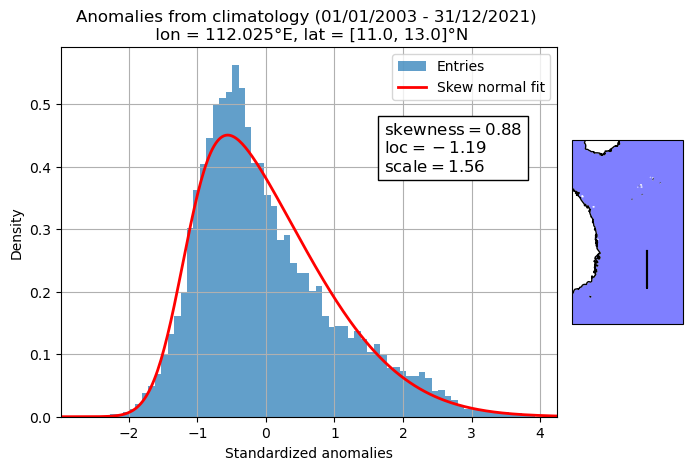

In [10]:
fig, ax = plot_histogram(chl_anomalies, [lon_min, lon_max], [lat_min, lat_max], region = True, fit_func=skewnorm)

title = "Anomalies from climatology (01/01/2003 - 31/12/2021) \n lon = %s°E, lat = %s°N" \
        %(lon_min, [lat_min, lat_max])

ax.set_title(title)

ax.set_xlabel("Standardized anomalies")

plt.savefig(images_path + "anomalies_histogram.png", bbox_inches = "tight")